# Reimplementing CanICA without nilearn.decompistion.canICA

In [16]:
%matplotlib inline

In [17]:
from nilearn import datasets
#dir='/raid/nilearn_data'
adhd_dataset = datasets.fetch_adhd(n_subjects=30,data_dir='/home/share/TmpData/Qinglin/nilearn_data/')
func_filenames = adhd_dataset.func  # list of 4D nifti files for each subject

# print basic information on the dataset
print('First functional nifti image (4D) is at: %s' %
      func_filenames[0])  # 4D data

First functional nifti image (4D) is at: /home/share/TmpData/Qinglin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


/usr/local/lib/python3.5/dist-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


In [18]:
from nilearn._utils.niimg_conversions import _resolve_globbing
imgs = _resolve_globbing(func_filenames)

In [19]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(func_filenames)

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, 
                     standardize=True,
                     detrend=1,
                     smoothing_fwhm=6., 
                     memory_level=2)
fmri_masked = masker.fit()

/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/storage/nilearn_cache'", use "location='/storage/nilearn_cache'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)


In [20]:
from nilearn.decomposition.base import mask_and_reduce

data = mask_and_reduce(
    masker, imgs, confounds=None,
    reduction_ratio=0.1,
    random_state=0,
    memory_level=3,
    n_jobs=8)

In [21]:
from nilearn.decomposition import CanICA
canica = CanICA(mask=masker, n_components=20, smoothing_fwhm=6.,
                memory_level=2,
                threshold=3., verbose=10, random_state=0)
canica._raw_fit(data)
components = canica.components_

S = (components ** 2).sum(axis=1)
S[S == 0] = 1
components /= S[:, np.newaxis]

[Memory]0.2s, 0.0min    : Loading randomized_svd from /storage/nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/612235e4d6188a57c8e00c826fa6115e
______________________________________randomized_svd cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=209652396)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=398764591)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 2.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=924231285)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=1478610112)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.7s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 3.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=441365315)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.7s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=1537364731)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.4s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 1.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=192771779)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.4s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=1491434855)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.0s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 3.4s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=1819583497)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.5s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 8.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.003057, ...,  0.004072],
       ...,
       [ 0.003257, ..., -0.002487]]), whiten=True, fun='cube', random_state=530702035)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.5s remaining:    0.0s
/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


__________________________________________________________fastica - 5.3s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.9s finished
/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [34]:
from sklearn.decomposition import dict_learning_online
dictionary, components=dict_learning_online(data,n_components=30, 
                                            dict_init=components,
                                            alpha=10,shuffle=1,
                                            batch_size=20,method="cd",
                                            verbose=1)


[dict_learning] ....................................................................................................| 

In [35]:
#dont run
save=components

In [47]:
components=save

In [44]:

from scipy import stats
components=stats.zscore(components,axis=1)



In [41]:
# Unit-variance scaling
S = np.sqrt(np.sum(components ** 2, axis=1))
S[S == 0] = 1
components /= S[:, np.newaxis]

In [48]:

import numpy as np
from scipy.stats import scoreatpercentile

abs_components = np.abs(components)
ratio=100. - (100. / len(components)) *3
threshold = scoreatpercentile(abs_components,ratio)
components[abs_components < threshold] = 0

for component in components:

    if np.sum(component > 0) < np.sum(component < 0):
        component *= -1

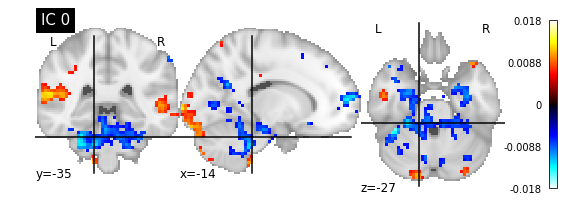

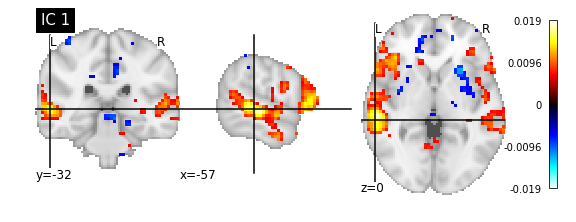

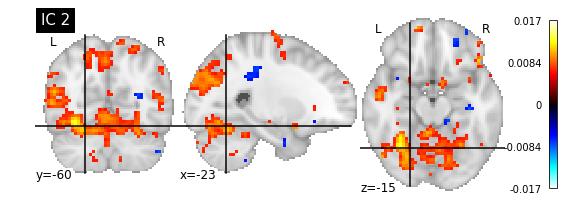

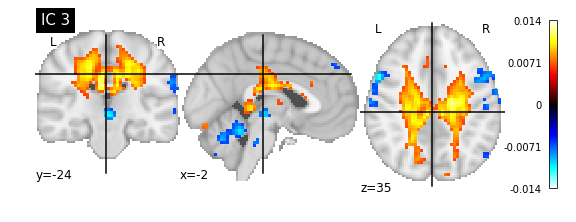

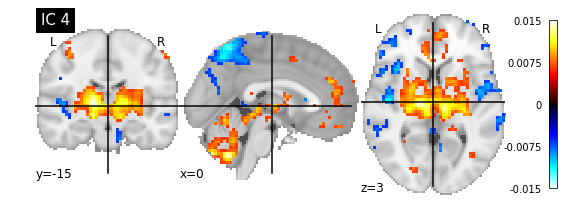

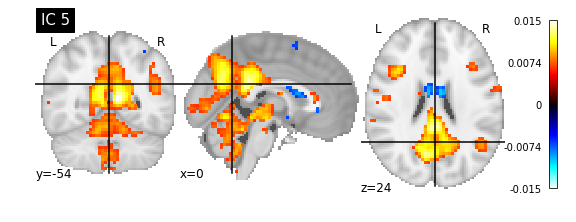

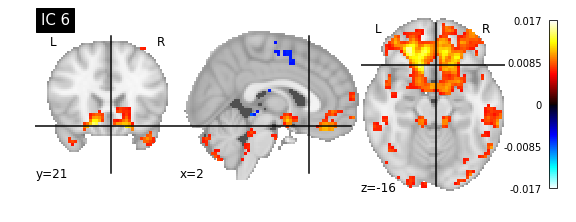

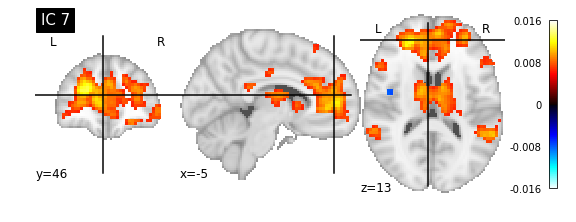

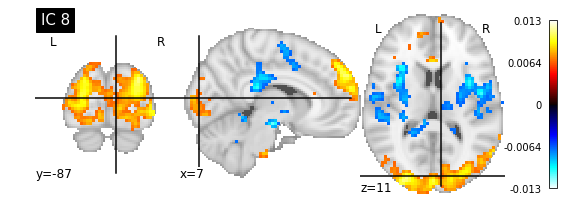

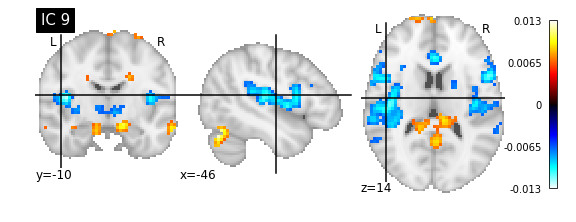

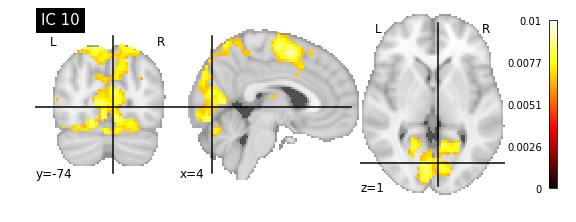

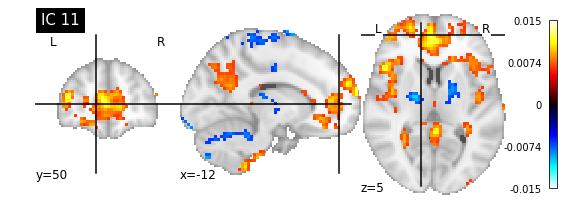

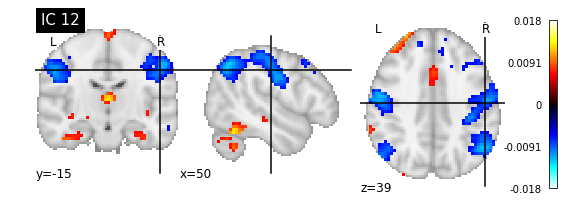

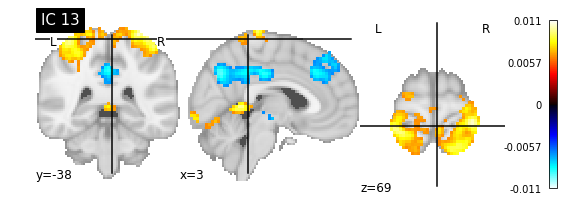

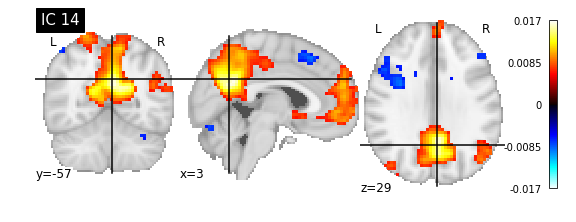

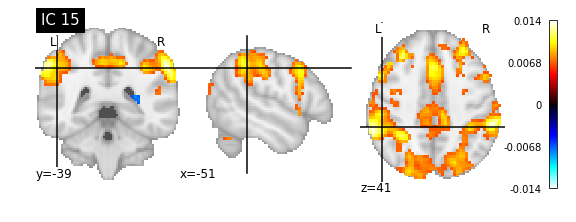

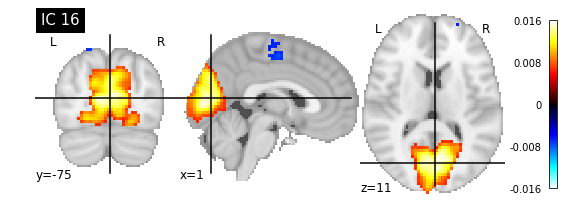

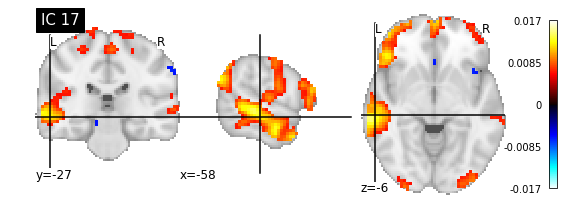

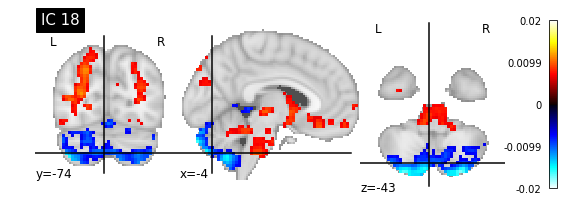

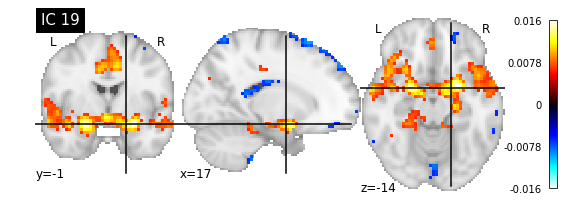

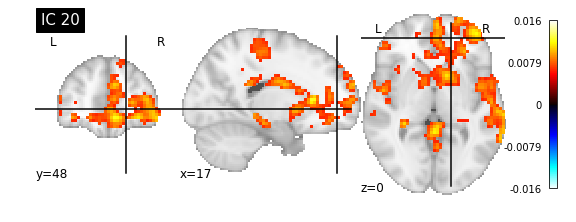

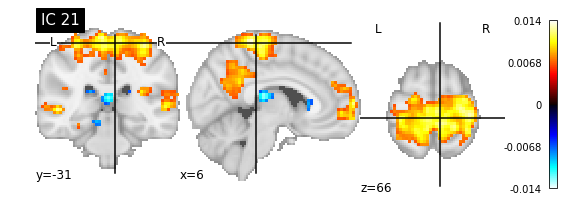

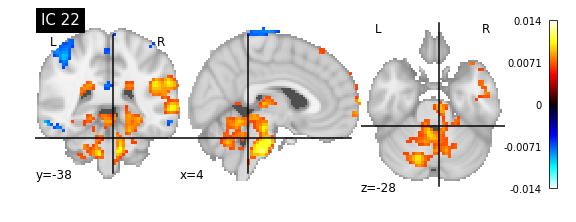

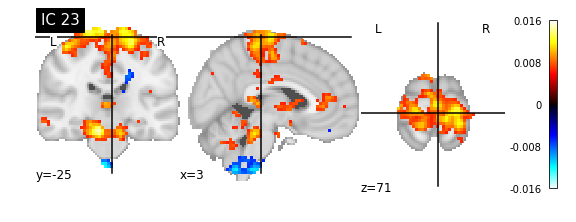

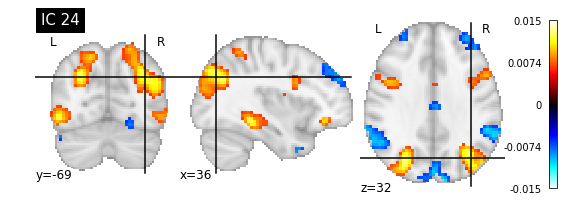

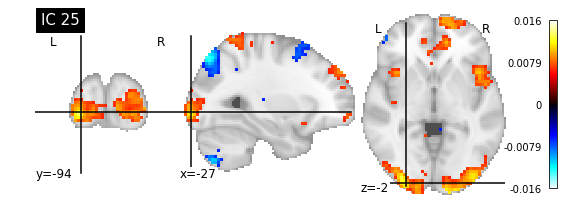

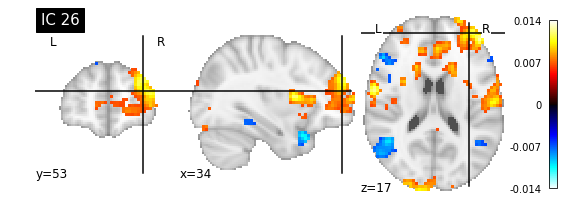

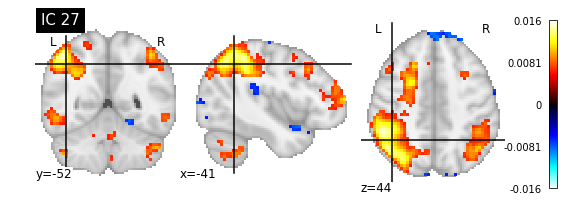

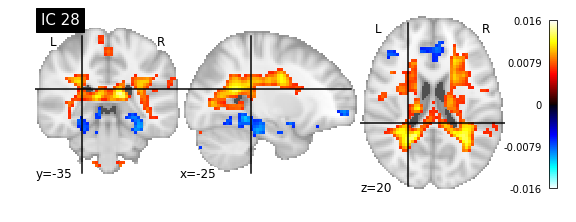

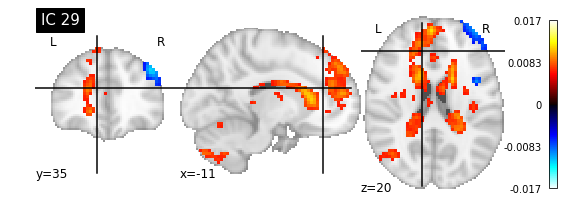

In [49]:
#components_img=[masker.inverse_transform(component) for component in components]
components_img=masker.inverse_transform(components)

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="ortho", title="IC %d" % i,
                  cut_coords=None, colorbar='bwr')

show()

In [52]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=2000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

IndexError: index (1117) out of range